In [11]:
import pandas as pd
import numpy as np
import random

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt


In [12]:
df

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151
...,...,...
392,09-01-2017,98.6154
393,10-01-2017,93.6137
394,11-01-2017,97.3359
395,12-01-2017,114.7212


In [13]:
# assign %10 random nulls to Value column

for i in df['Value'].sample(frac=0.1, random_state=0).index:
    print(i)
    df['Value'].loc[i]=np.nan

65
132
74
78
37
54
293
60
12
361
278
311
100
59
345
173
171
332
135
255
230
308
396
76
331
284
340
368
341
134
259
319
154
219
176
170
175
357
301
90


c:\Users\qw\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [14]:
df

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151
...,...,...
392,09-01-2017,98.6154
393,10-01-2017,93.6137
394,11-01-2017,97.3359
395,12-01-2017,114.7212


In [15]:
df.isnull().sum()

DATE      0
Value    40
dtype: int64

In [16]:
# print dataframe only null values

df[df.isnull().any(axis=1)]

,DATE,Value
12,01-01-1986,NaN
37,02-01-1988,NaN
54,07-01-1989,NaN
59,12-01-1989,NaN
60,01-01-1990,NaN
65,06-01-1990,NaN
74,03-01-1991,NaN
76,05-01-1991,NaN
78,07-01-1991,NaN
90,07-01-1992,NaN


std: 15.460429108677843
mean: 88.54300364145656


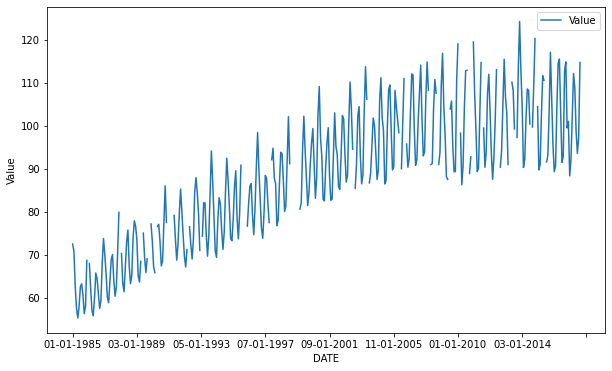

In [17]:
# graph before filling 

ax = df.set_index('DATE').plot(figsize=(10, 6))
ax.set_ylabel('Value')
ax.set_xlabel('DATE')

print('std:', df.Value.std())
print('mean:', df.Value.mean())
plt.show()

In [18]:
# filling method = 'bfill' if index == 0; if index !=0 filling with linear regression

for i in range(len(df[df.isnull().any(axis=1)])):
    
    if df[df.isnull().any(axis=1)].index[0] == 0:
        df.Value.fillna(method='bfill', limit=1, inplace=True)
    else:
        x = np.array(df.iloc[:df[df.isnull().any(axis=1)].index[0],1].index.values).reshape(-1,1)
        y = np.array(df.iloc[:df[df.isnull().any(axis=1)].index[0],1]).reshape(-1,1)
        reg = LinearRegression().fit(x, y)
        predict_value = reg.predict([[df[df.isnull().any(axis=1)].index[0]+1]])
        df.Value.fillna(float(predict_value), limit=1, inplace=True)

std: 15.514311094427342
mean: 88.96527045089653


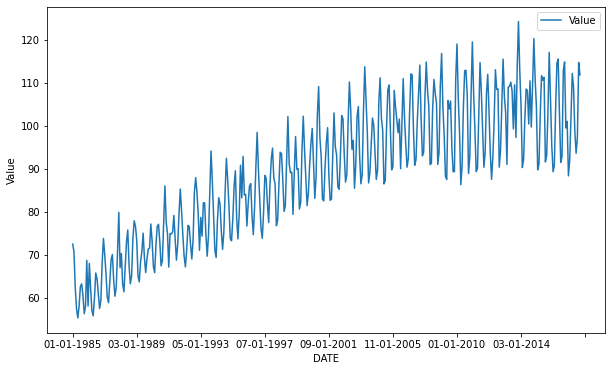

In [19]:
ax = df.set_index('DATE').plot(figsize=(10, 6))
ax.set_ylabel('Value')
ax.set_xlabel('DATE')

print('std:', df.Value.std())
print('mean:', df.Value.mean())
plt.show()

In [20]:
df.isnull().sum()

DATE     0
Value    0
dtype: int64